In [ ]:
!pip uninstall -y torch torchvision
!pip install torch torchvision --no-cache-dir


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 233.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 202.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 238.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 228.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 198.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 245.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 225.3 MB/s eta 0:00:00
   ━━━━━━━

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 157MB/s]


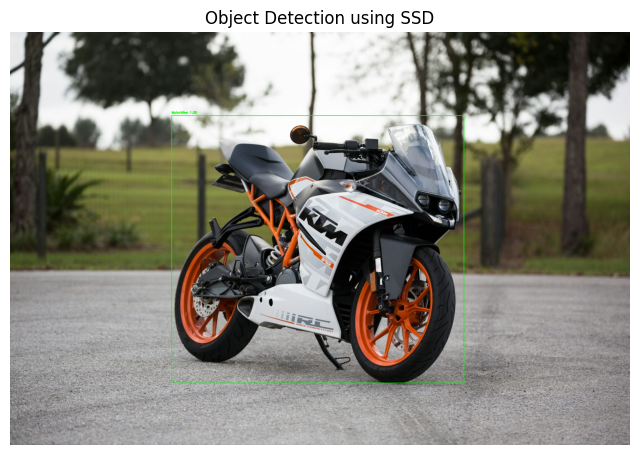

In [1]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the SSD300 model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()

# COCO labels
COCO_LABELS = ["__background__","Human", "Bike", "Car", "Motorbike", "Plane", "Bus",
               "Train", "Truck", "Boat", "Signal", "Hydrant", "Stop Sign",
               "Parking", "Bench", "Bird", "Cat", "Dog", "Horse", "Sheep", "Cow",
               "Elephant", "Bear", "Zebra", "Giraffe", "Backpack", "Umbrella", "Bag",
               "Tie", "Luggage", "Frisbee", "Skis", "Snowboard", "Ball", "Kite",
               "Bat", "Glove", "Skateboard", "Surfboard", "Racket",
               "Bottle", "Wineglass", "Cup", "Fork", "Knife", "Spoon", "Bowl", "Banana",
               "Apple", "Sandwich", "Orange", "Broccoli", "Carrot", "Hotdog", "Pizza",
               "Donut", "Cake", "Chair", "Couch", "Plant", "Bed", "Dining Table",
               "Toilet", "TV", "Laptop", "Mouse", "Remote", "Keyboard", "Mobile",
               "Microwave", "Oven", "Toaster", "Sink", "Fridge", "Book", "Clock",
               "Vase", "Scissors", "Teddy", "Hair Dryer", "Toothbrush"]

# Load and preprocess the image
image_path = "/content/bike.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Store original dimensions
orig_height, orig_width = image.shape[:2]

# Resize image to 300x300 for the model
image_resized = cv2.resize(image_rgb, (300, 300))
image_tensor = torch.tensor(image_resized / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# Run inference
with torch.no_grad():
    predictions = model(image_tensor)

# Extract predictions
boxes = predictions[0]["boxes"].numpy()
labels = predictions[0]["labels"].numpy()
scores = predictions[0]["scores"].numpy()

# Scale bounding boxes back to original image dimensions
scale_x = orig_width / 300
scale_y = orig_height / 300

for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:
        # Scale the bounding box coordinates
        x1, y1, x2, y2 = box
        x1 = int(x1 * scale_x)
        y1 = int(y1 * scale_y)
        x2 = int(x2 * scale_x)
        y2 = int(y2 * scale_y)

        # Draw rectangle and label on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{COCO_LABELS[label]}: {score:.2f}"
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert back to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Object Detection using SSD")
plt.show()